In [ ]:

# We can easily leverage the power of machine learning to predict house prices (dependent variable) based on various 
# features (independent variables) related to house prices.

# We use a RandomForestRegressor as our machine learning model.
# We encode the 'location' column using Label Encoding to convert categorical data into a numerical format.
# We split the dataset into training and testing sets.
# The model is trained on the training set and evaluated on the testing set using Mean Absolute Error.


In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder


# Generate random sample data
np.random.seed(42)  # Set seed for reproducibility

# Generating random values for each feature
area = np.random.randint(800, 2500, size=1000)
bedrooms = np.random.randint(1, 5, size=1000)
bathrooms = np.random.randint(1, 4, size=1000)
locations = np.random.choice(['Suburb', 'Downtown', 'Countryside'], size=1000)
year_built = np.random.randint(1990, 2023, size=1000)
price = 1000 * area + 30000 * bedrooms + 20000 * bathrooms + 50000 * (locations == 'Downtown') + 10000 * (locations == 'Countryside') + 500 * (2023 - year_built)


# Create DataFrame
df = pd.DataFrame({'area': area, 'bedrooms': bedrooms, 'bathrooms': bathrooms, 'location': locations, 'year_built': year_built, 'price': price})


# Display the DataFrame
print(df.head())


   area  bedrooms  bathrooms  location  year_built    price
0  1926         4          1    Suburb        1992  2081500
1  2259         2          1  Downtown        2021  2390000
2  1660         1          2  Downtown        2010  1786500
3  2094         2          3  Downtown        2010  2270500
4  1930         3          2  Downtown        2000  2121500


In [2]:

# Let's assume the dataset has columns like 'area', 'bedrooms', 'bathrooms', 'location', 'year_built', 'price'
# This code uses LabelEncoder to encode the 'location' column, converting categorical location data into numerical 
# format. This is necessary because machine learning models generally require numerical input.

le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])


# Select features (X) and target variable (y)
X = df[['area', 'bedrooms', 'bathrooms', 'location', 'year_built']]
y = df['price']


# Split the data into training and testing sets
# This line splits the data into training and testing sets using the train_test_split function. The training set 
# (80%) is used to train the model, and the testing set (20%) is used to evaluate its performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)


# The model is trained on the training set using the fit method.
model.fit(X_train, y_train)


# The trained model is used to make predictions on the testing set.
predictions = model.predict(X_test)


# The Mean Absolute Error (MAE) is calculated to evaluate the model's performance. MAE represents the average 
# absolute difference between the predicted and actual prices in the testing set.
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 20632.4


In [ ]:

# The Mean Absolute Error (MAE) is a metric used to evaluate the performance of a regression model. In the context of 
# this code, the MAE is calculated to measure the average absolute difference between the predicted prices (predictions) 
# and the actual prices (y_test) for the real estate dataset.

# On average, the model's predictions for the prices of the real estate properties in the testing set are off by 
# approximately $20,632.4. In other words, the average absolute difference between the predicted prices and the 
# actual prices is $20,632.4.


In [3]:

# 1
# Now, you can use the model to predict prices for new data
new_data = pd.DataFrame({'area': [1500], 'bedrooms': [4], 'bathrooms': [2], 'location': [le.transform(['Downtown'])[0]], 'year_built': [2005]})
predicted_price = model.predict(new_data)
print(f'Predicted Price: ${predicted_price[0]:,.2f}')


Predicted Price: $1,684,030.00


In [5]:

# 2
# Let's assume 2000 square feet and 4 bedrooms. We can expect the price to increase because this house is larger than
# the first house, and it has one additional bedroom, but everything else remains the same as the first scenario.

new_data = pd.DataFrame({'area': [2000], 'bedrooms': [5], 'bathrooms': [2], 'location': [le.transform(['Downtown'])[0]], 'year_built': [2005]})
predicted_price = model.predict(new_data)
print(f'Predicted Price: ${predicted_price[0]:,.2f}')


Predicted Price: $2,172,400.00


In [8]:

# 3
# Let's assume the house is located in the countryside and it has 3 bedrooms. We can expect the price to decrease 
# because this house is not located downtown and it has 3 bedrooms, but everything else remains the same as the 
# first scenario.

new_data = pd.DataFrame({'area': [1500], 'bedrooms': [3], 'bathrooms': [2], 'location': [le.transform(['Countryside'])[0]], 'year_built': [2005]})
predicted_price = model.predict(new_data)
print(f'Predicted Price: ${predicted_price[0]:,.2f}')


Predicted Price: $1,647,925.00


In [9]:

# 4
# Let's assume 3000 square feet and 6 bedrooms. We can expect the price to increase because this house is larger than
# the first house, and it has one additional bedroom, but everything else remains the same as the first scenario.

new_data = pd.DataFrame({'area': [3000], 'bedrooms': [6], 'bathrooms': [4], 'location': [le.transform(['Downtown'])[0]], 'year_built': [2005]})
predicted_price = model.predict(new_data)
print(f'Predicted Price: ${predicted_price[0]:,.2f}')


Predicted Price: $2,692,360.00


In [11]:

# 5
# Let's assume the house is located in the suburbs and it is a newer house. We can expect the price to decrease, but
# just slightly, and everything else remains the same as the first scenario.

new_data = pd.DataFrame({'area': [1500], 'bedrooms': [4], 'bathrooms': [2], 'location': [le.transform(['Suburb'])[0]], 'year_built': [2015]})
predicted_price = model.predict(new_data)
print(f'Predicted Price: ${predicted_price[0]:,.2f}')


Predicted Price: $1,663,825.00


In [14]:

# So, what has the largest impact on the price of a house, given the data set that we are working with here?
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

rf.feature_importances_


array([9.94861308e-01, 3.08459995e-03, 6.77953504e-04, 5.71465763e-04,
       8.04672579e-04])

Text(0.5, 0, 'Random Forest Feature Importance')

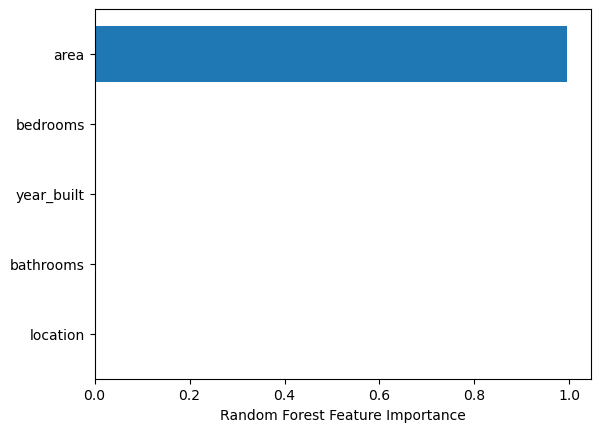

In [15]:

sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


In [ ]:

# Interpreting feature importance in a Random Forest model involves understanding which features have a greater impact 
#on the model's predictions. The importance is calculated based on how frequently a feature is used to split the data 
# across all the trees in the forest and how much improvement each split provides.

# Higher Importance: Features with higher importance values are more influential in making predictions. If a feature 
# has a higher importance score, it means that, on average, the model relies more on this feature to make decisions.

# Direction of Impact: If a feature has a positive impact on the target variable, a higher value of that feature would 
# lead to higher predictions. Conversely, if a feature has a negative impact, a higher value might lead to lower 
# predictions.

# Correlation with the Target: High feature importance doesn't necessarily mean a feature has a linear relationship 
# with the target. It could also indicate non-linear relationships or interactions with other features.


In [19]:

# From the Feature Importance exercise, we know almost 100% of the price of a house (based on this sepecific data
# set) is determined by the overall square footage of the property. The other four features have almost no influence,
# at all, on the target variable (price).

# Let's revisit the initial scenario, divide the square footage in half, and leave everything else unchanged. 

new_data = pd.DataFrame({'area': [750], 'bedrooms': [4], 'bathrooms': [2], 'location': [le.transform(['Downtown'])[0]], 'year_built': [2005]})
predicted_price = model.predict(new_data)
print(f'Predicted Price: ${predicted_price[0]:,.2f}')

print('-----------------------------------')

# Let's revisit the initial scenario, double the square footage in half, and leave everything else unchanged. 

new_data = pd.DataFrame({'area': [6000], 'bedrooms': [4], 'bathrooms': [2], 'location': [le.transform(['Downtown'])[0]], 'year_built': [2005]})
predicted_price = model.predict(new_data)
print(f'Predicted Price: ${predicted_price[0]:,.2f}')


Predicted Price: $1,008,780.00
-----------------------------------
Predicted Price: $2,694,200.00
